In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from glob import glob
import IPython.display as ipd
import tensorflow as tf
from PIL import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/bird-song-data-set/bird_songs_metadata.csv")
df.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [3]:
class_names = df["name"].unique()
print(class_names)

["Bewick's Wren" 'Northern Mockingbird' 'American Robin' 'Song Sparrow'
 'Northern Cardinal']


In [4]:
df["name"].value_counts()

name
Song Sparrow            1256
Northern Mockingbird    1182
Northern Cardinal       1074
American Robin          1017
Bewick's Wren            893
Name: count, dtype: int64

<BarContainer object of 5 artists>

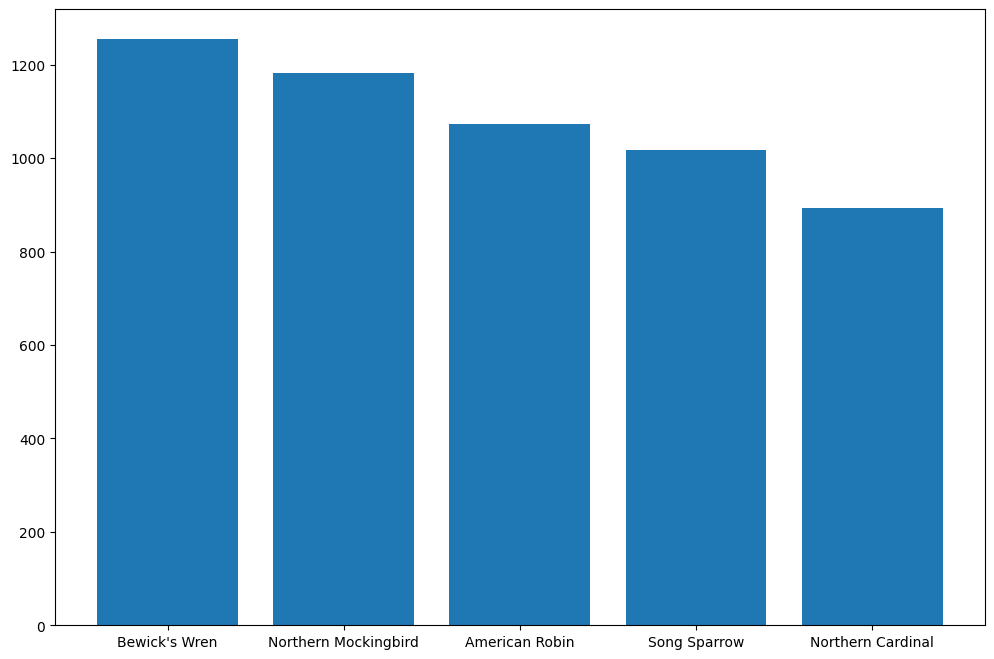

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df["name"].unique(), df["name"].value_counts())

Getting all the WAV files

In [6]:
path_to_wav = "/kaggle/input/bird-song-data-set/wavfiles/"
datafiles = glob(path_to_wav + "*")

Function to generate a spectrogram

In [7]:
def generate_spectrogram(file_audio, identifier):
    audio_data, sample_rate = librosa.load(path_to_wav + file_audio)
    spec_mel = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    spec_mel = librosa.power_to_db(spec_mel, ref=np.max)
    figure, axis = plt.subplots(figsize=(15, 5))
    axis.set_title("Mel Spectrogram")
    plt.suptitle(identifier)
    librosa.display.specshow(spec_mel, x_axis='time', y_axis='log', ax=axis)
    return ipd.Audio(path_to_wav + file_audio, rate=sample_rate)

Generating random spectrogram

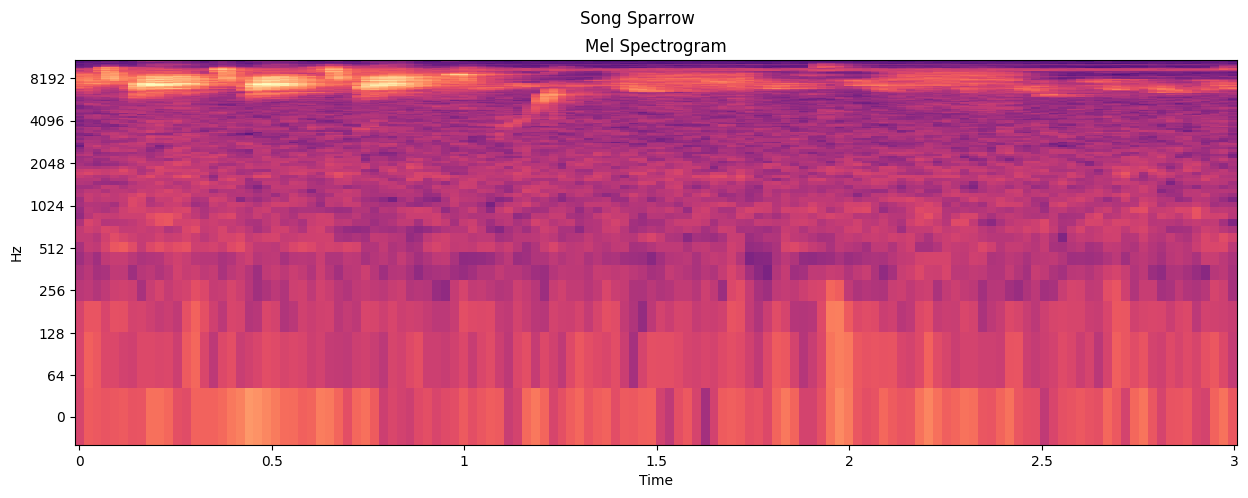

In [8]:
i = np.random.randint(0, df.shape[0])
generate_spectrogram(df.loc[i, "filename"], df.loc[i, "name"])

In [9]:
df.shape

(5422, 18)

Plotting waveform

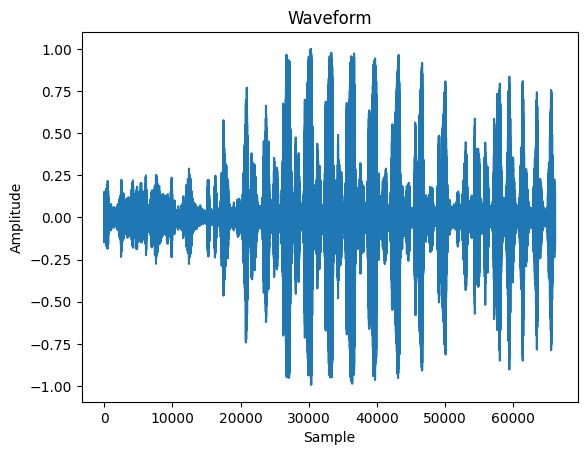

In [10]:
filename = "/kaggle/input/bird-song-data-set/wavfiles/101308-0.wav"
audio_data, sample_rate = librosa.load(filename)

plt.plot(audio_data)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

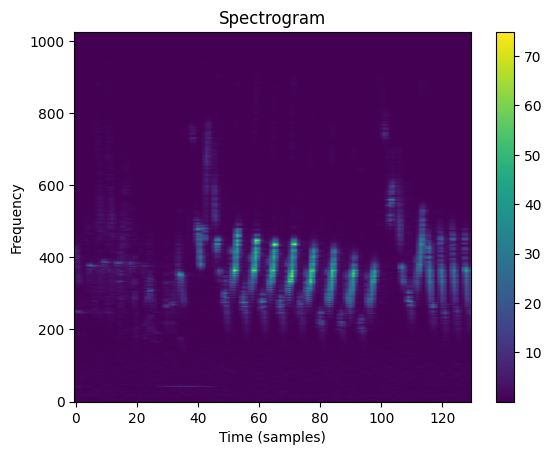

In [11]:
filename ="/kaggle/input/bird-song-data-set/wavfiles/101308-0.wav"
audio_data, sample_rate = librosa.load(filename)
spectrogram = librosa.stft(audio_data)
spectrogram = np.abs(spectrogram)

plt.imshow(spectrogram, origin='lower', aspect='auto')
plt.title("Spectrogram")
plt.xlabel("Time (samples)")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

Preprocessing function for audio

In [12]:
def process_audio(audio_file):
    audio_data, sample_rate = librosa.load(audio_file, duration=10)
    mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate) 
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec

In [13]:
filename = '/kaggle/input/bird-song-data-set/wavfiles/101308-0.wav'
print(len(process_audio(filename)))
print(len(process_audio(filename)[0]))


128
130


Generating a pandas Dataframe to process the data from the CSV and wav files

In [14]:
df_train = pd.DataFrame({"name": df["name"], "audiopath": path_to_wav + df["filename"]})

# Assuming `process_audio` is a function that generates mel spectrograms
df_train["mel_spec"] = df_train["audiopath"].apply(lambda x: process_audio(x))

# Using factorize to encode class labels
df_train["class"] = df_train["name"].factorize()[0]

Shuffle data

In [15]:
from sklearn.utils import shuffle

df_train = shuffle(df_train)
df_train.shape

(5422, 4)

Seperate train and test data

In [17]:
(train_x, train_y) = df_train["mel_spec"][:5000].values, df_train["class"][:5000].values
(test_x, test_y) = df_train["mel_spec"][5000:].values, df_train["class"][5000:].values

In [18]:
from keras.utils import to_categorical

test_y = to_categorical(test_y, num_classes=len(class_names))
train_y = to_categorical(train_y, num_classes=len(class_names))


Normalize data and generate Tensorflow datasets

In [19]:
train_x = np.stack(train_x[:])
test_x = np.stack(test_x[:])

train_x = tf.keras.utils.normalize(train_x)
test_x = tf.keras.utils.normalize(test_x)

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))

Setting batch sizes

In [20]:
train_dataset = train_dataset.batch(10)
test_dataset = test_dataset.batch(10)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [21]:
import keras
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Reshape, InputLayer, Dropout
from keras.applications import InceptionResNetV2
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras import layers




Setting up model

In [22]:
model = keras.models.Sequential()
# def stem(inputs):
#model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128, 130))


model.add(InputLayer(input_shape=(128,130)))
model.add(Reshape((128,130,1)))
model.add(Conv2D(32, (8, 8), input_shape=(128, 130), activation='relu'))
model.add(Conv2D(32, (8,8), activation='relu'))
model.add(Conv2D(64, (8,8), activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (2,2), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [132]:
model = keras.models.Sequential()

model.add(InputLayer(input_shape=(128,130)))
model.add(Reshape((128,130,1)))
model.add(Conv2D(32, (8, 8), input_shape=(128, 130), activation='relu'))
model.add(Conv2D(32, (8, 8), activation='relu'))
model.add(Conv2D(64, (8, 8), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(80, (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 128, 130, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 121, 123, 32)      2080      
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 116, 32)      65568     
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 109, 64)      131136    
                                                                 
 batch_normalization (Batch  (None, 107, 109, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 35, 36, 64)        0         
 D)                                                     

In [ ]:
# model2 = keras.models.Sequential()

# model2.add(InputLayer(input_shape=(128,130)))
# model2.add(Reshape((128,130,1)))
# model2.add(Conv2D(64, (8, 8), input_shape=(128, 130), activation='relu'))
# model2.add(BatchNormalization())
# model2.add(MaxPooling2D(pool_size=(2,2)))
# model2.add(Conv2D(16, (2,2), activation='relu'))
# model2.add(Flatten())
# model2.add(Dropout(0.5))
# model2.add(Dense(128, activation='relu'))
# model2.add(Dense(5, activation='softmax'))

In [ ]:
# model3 = keras.models.Sequential()

# model3.add(InputLayer(input_shape=(128,130)))
# model3.add(Reshape((128,130,1)))
# model3.add(Conv2D(64, (8, 8), input_shape=(128, 130), activation='relu'))
# model3.add(BatchNormalization())
# model3.add(MaxPooling2D(pool_size=(2,2)))
# model3.add(Conv2D(16, (2,2), activation='relu'))
# model3.add(Flatten())
# model3.add(Dropout(0.5))
# model3.add(Dense(128, activation='relu'))
# model3.add(Dense(5, activation='softmax'))

Model compiling

In [24]:
model.compile('adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), 'accuracy'])

In [ ]:
# model2.compile('adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), 'accuracy'])

In [ ]:
# model3.compile('adam', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), 'accuracy'])

Model training

In [26]:
hist = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
500/500 [==============================] - 13s 26ms/step - loss: 1.1037 - recall: 0.3490 - precision: 0.6341 - accuracy: 0.5306 - val_loss: 1.4652 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.3436
Epoch 2/20
500/500 [==============================] - 13s 25ms/step - loss: 0.8920 - recall: 0.5170 - precision: 0.7104 - accuracy: 0.6318 - val_loss: 3.7456 - val_recall: 0.2796 - val_precision: 0.2816 - val_accuracy: 0.2820
Epoch 3/20
500/500 [==============================] - 13s 25ms/step - loss: 0.7131 - recall: 0.6394 - precision: 0.7813 - accuracy: 0.7146 - val_loss: 5.8873 - val_recall: 0.2393 - val_precision: 0.2393 - val_accuracy: 0.2393
Epoch 4/20
500/500 [==============================] - 13s 25ms/step - loss: 0.5930 - recall: 0.7116 - precision: 0.8129 - accuracy: 0.7672 - val_loss: 5.6499 - val_recall: 0.2915 - val_precision: 0.2950 - val_accuracy: 0.2986
Epoch 5/20
500/500 [==============================] - 13s 26ms/step - loss: 0.5009 - rec

In [ ]:
# hist2 = model2.fit(train_dataset, epochs=50, validation_data=test_dataset)

In [ ]:
# hist3 = model3.fit(train_dataset, epochs=20, validation_data=test_dataset)

Model evaluation on accuracy on test dataset

In [27]:
model.evaluate(test_dataset)

43/43 [==============================] - 0s 10ms/step - loss: 1.6213 - recall: 0.7299 - precision: 0.7386 - accuracy: 0.7417


[1.6212977170944214, 0.7298578023910522, 0.7386091351509094, 0.741706132888794]

In [ ]:
# model2.evaluate(test_dataset)

In [ ]:
# model3.evaluate(test_dataset)

In [37]:
y_pred=model.predict(test_x) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(test_y, axis=1)

14/14 [==============================] - 0s 17ms/step


In [38]:
print(y_pred)
print(y_test)

[2 3 4 4 1 0 4 3 4 1 3 3 2 1 3 4 3 1 0 1 0 4 3 2 3 3 3 4 4 3 1 3 3 4 4 3 1
 2 3 0 1 4 1 3 1 3 4 3 4 4 2 4 3 3 3 0 4 3 4 3 1 3 0 4 2 1 3 1 0 3 3 1 2 4
 0 2 4 2 3 3 1 3 4 3 4 2 1 3 1 4 2 4 3 3 1 0 3 3 3 3 1 1 3 3 4 1 1 1 2 3 4
 1 3 1 3 1 3 1 1 1 2 4 2 3 1 3 3 3 3 4 4 1 4 3 0 3 1 3 1 3 2 0 2 4 3 4 1 4
 3 3 4 1 3 3 2 4 3 2 3 3 3 4 4 1 1 1 4 3 4 2 0 3 2 3 2 3 3 3 3 3 1 0 1 0 3
 1 3 1 2 3 2 3 4 1 2 3 3 4 1 2 4 1 1 2 1 1 0 3 4 4 3 1 4 2 4 3 2 0 2 3 1 3
 3 3 3 2 4 0 3 2 3 1 1 1 3 1 0 4 4 3 4 3 0 1 1 3 3 4 3 1 1 3 2 1 3 4 0 3 1
 2 2 3 3 3 0 3 4 4 2 4 3 2 0 1 2 2 2 2 3 3 3 4 2 2 3 3 3 3 4 0 3 4 3 3 2 3
 2 3 3 1 3 3 4 2 0 3 3 4 3 3 1 3 1 2 1 3 3 2 3 4 1 1 3 3 4 1 3 3 4 4 4 4 3
 3 1 1 3 3 4 1 1 3 4 3 4 4 1 1 1 3 4 4 1 3 2 3 3 3 2 0 2 3 3 3 3 0 3 1 1 1
 4 0 2 1 2 4 4 2 0 4 4 3 0 4 1 2 2 2 4 4 2 4 3 3 4 3 2 3 1 2 3 3 3 3 4 4 3
 3 4 4 4 4 2 3 1 1 3 2 2 3 3 3]
[2 3 4 4 1 0 4 3 4 1 4 0 1 1 2 4 0 1 0 1 0 4 1 2 3 3 3 3 4 3 3 0 0 4 1 3 2
 2 3 0 1 1 1 3 1 3 1 3 4 4 2 4 3 0 4 0 4 3 4 0 1 0 0 4 1 1 3 1 0 3 3

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(cm)

[[29  0  1 39  0]
 [ 0 62  7 11 10]
 [ 0 16 51  9  3]
 [ 0  2  1 97  1]
 [ 0  4  2  3 74]]


In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        69
           1       0.74      0.69      0.71        90
           2       0.82      0.65      0.72        79
           3       0.61      0.96      0.75       101
           4       0.84      0.89      0.87        83

    accuracy                           0.74       422
   macro avg       0.80      0.72      0.73       422
weighted avg       0.79      0.74      0.73       422



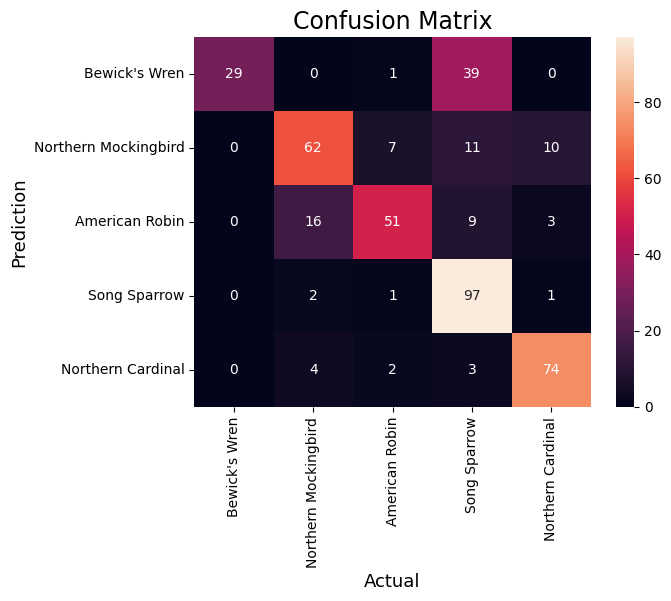

In [45]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=["Bewick's Wren","Northern Mockingbird","American Robin","Song Sparrow","Northern Cardinal"],
            yticklabels=["Bewick's Wren","Northern Mockingbird","American Robin","Song Sparrow","Northern Cardinal"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Lots of plots

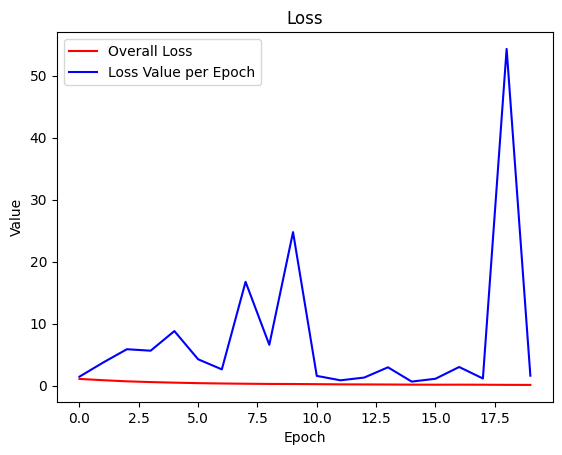

In [46]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r', label='Overall Loss')
plt.plot(hist.history['val_loss'], 'b', label='Loss Value per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# plt.title('Loss')
# plt.plot(hist.history['loss'], 'r', label='Loss for 100 Epoch model')
# plt.plot(hist2.history['loss'], 'b', label='Loss for 50 Epoch model')
# plt.plot(hist3.history['loss'], 'g', label='Loss for 20 Epoch model')
# plt.xlabel('Epoch')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

KeyError: 'precision_15'

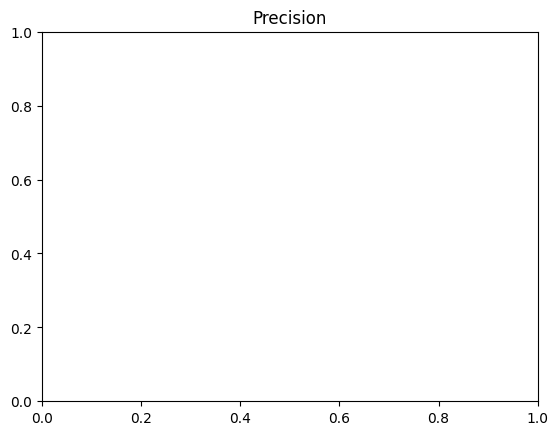

In [48]:
plt.title('Precision')
plt.plot(hist.history['precision_15'], 'r', label='Overall Precision')
plt.plot(hist.history['val_precision_14'], 'b', label='Precision Value per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

KeyError: 'val_recall_14'

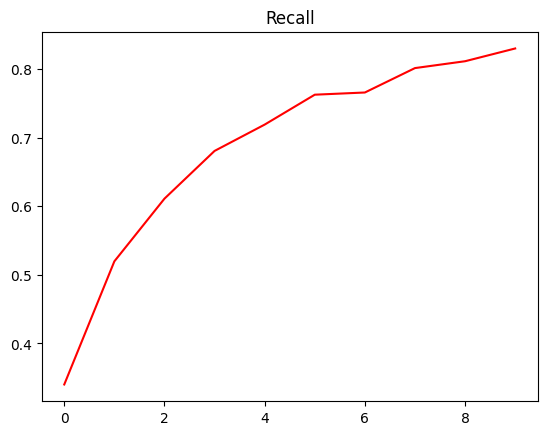

In [142]:
plt.title('Recall')
plt.plot(hist.history['recall_15'], 'r', label='Overall Recall')
plt.plot(hist.history['val_recall_14'], 'b', label='Recall Value per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

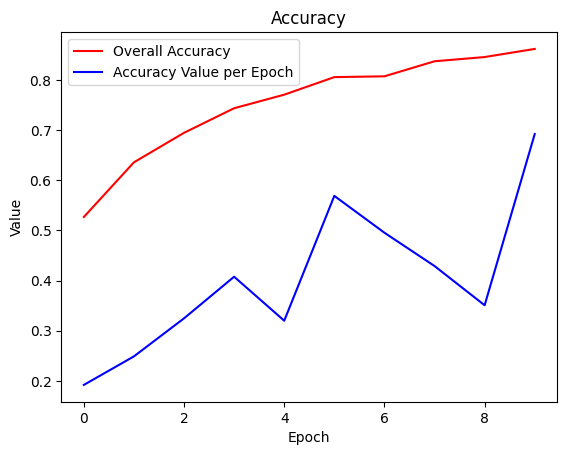

In [143]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'r', label='Overall Accuracy')
plt.plot(hist.history['val_accuracy'], 'b', label='Accuracy Value per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [144]:
audio_file = '/kaggle/input/bird-song-data-set/wavfiles/101308-9.wav'
audio_data, sample_rate = librosa.load(audio_file, duration=3)
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate) 
mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
mel_spec = tf.expand_dims(mel_spec, axis=0)
bird_list = ["Bewick's Wren", "Northern Mockingbird", "American Robin", "Song Sparrow", "Northern Cardinal"]

test=model.predict(mel_spec)

print(test)

1/1 [==============================] - 0s 39ms/step
[[0. 0. 0. 1. 0.]]


Generate model file for easy usage later

In [ ]:
# from IPython.display import FileLink

# model.save("saved_model") 
# !zip -r saved_model.zip './saved_model' 
# FileLink(r'./saved_model.zip')

In [49]:
model.save('my_model.h5')

# Download the model file
import shutil
shutil.move('my_model.h5', '/kaggle/working/my_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/kaggle/working/my_model.h5'